In [1]:
from scipy.io import arff
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import MetricFunctions

In [2]:
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8').astype(int)
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [3]:
param_grid = {
    'learning_rate': [0.2],#[0.001, 0.01, 0.1, 0.2],
    'min_child_weight': [3],#[int(x) for x in range(1, 4, 1)],
    'n_estimators': [220],#[int(x) for x in range(10, 310, 10)],
    'max_depth': [10],#[None] + [int(x) for x in range(10, 120, 10)],
    'scale_pos_weight': [sum(y_train == 0) / sum(y_train == 1)]
}

model = XGBClassifier()
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [4]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 220, 'scale_pos_weight': 0.8041615667074663}
Best Accuracy:  0.9685662596110358


In [5]:
MetricFunctions.printAccuracy(best_model, X_train, X_test, y_train, y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, y_train, y_test)

Test accuracy: 96.61%
Train accuracy: 98.82%
Test Log Loss: 0.08002570417758048
Train Log Loss: 0.0328160781290525


In [6]:
MetricFunctions.printAUCandPvalues(y_test, y_score)

AUC-ROC: 0.9955312640650785
P-value: 0.00893747186984295


In [7]:
MetricFunctions.printAUCPRandF1Scores(y_test, y_pred, y_score)

AUC-PR: 0.9962431323595133
F1 Score: 0.970367443698143


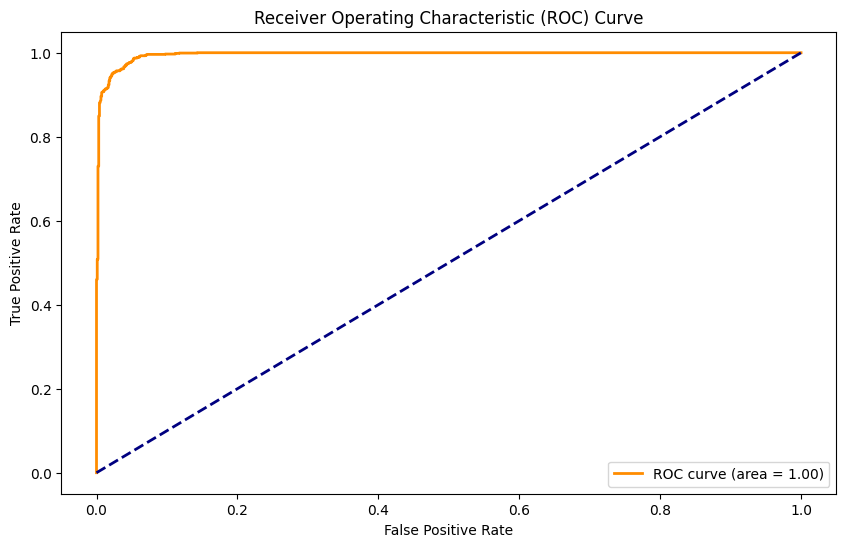

In [8]:
MetricFunctions.plotROCCurve(y_test, y_score)

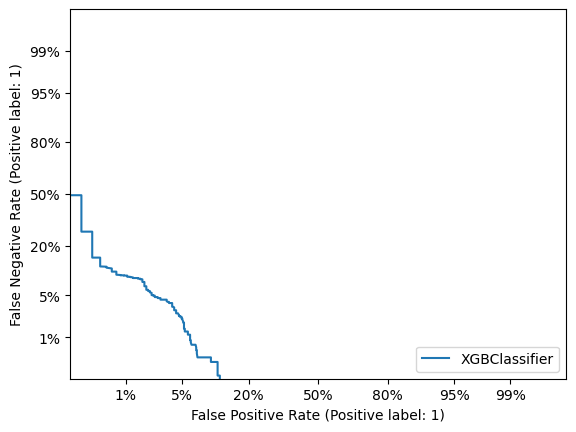

In [9]:
MetricFunctions.plotDetCurve(best_model, X_test, y_test)

Confusion Matrix:
[[ 908   48]
 [  27 1228]]


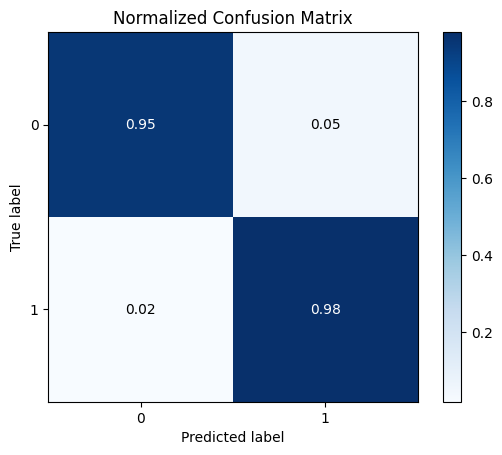

In [10]:
MetricFunctions.printConfMatrix(y_test, y_pred)
MetricFunctions.plotConfMatrix(y_test, y_pred)

C:\Users\Vilius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


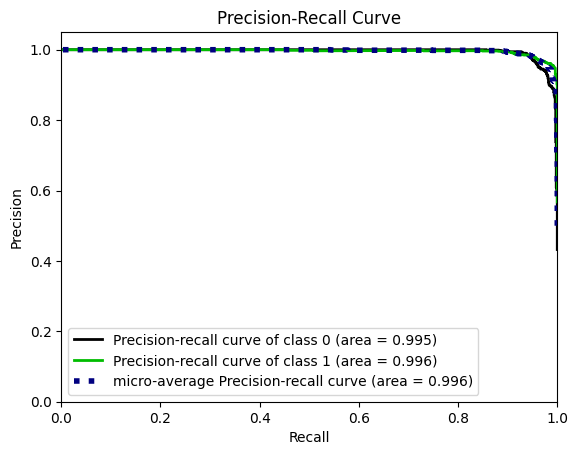

In [11]:
MetricFunctions.plotPrecisionRecallCurve(y_test, y_prob)

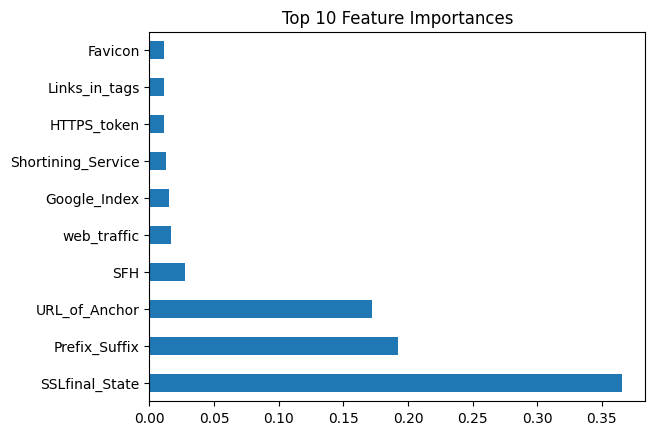

In [12]:
MetricFunctions.plotFeatureImportance(best_model, X)

In [14]:
import joblib
joblib.dump(best_model, 'models/xgb_model.pkl')

['models/xgb_model.pkl']